In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical

In [33]:
lbls = np.array([],dtype=int)
full_list = pd.DataFrame(np.zeros((1,400)))

In [34]:
ntrain = 8

In [35]:
for o in range(ntrain):
    lbls = np.append(lbls,np.loadtxt("imgs" + str(o) + "/labels" +str(o) + ".txt", usecols=range(20), dtype=int).reshape(400))
    for i in range(20):
        for j in range(20):
            im = Image.open("imgs" + str(o) + "/img" + str(i) + "_" + str(j) + ".png").convert("L")
            imarr = pd.Series(np.asarray(im).flatten().reshape(400))
            full_list = full_list.append(imarr,ignore_index=True)
    if o == 0:
        full_list = full_list.drop(0,axis=0)
        full_list = full_list.reset_index()
        full_list = full_list.drop('index',axis=1)

labels_all = pd.Series(lbls)

In [118]:
X = full_list.values.reshape((3200,20,20,1))
y = labels_all.values

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=69)

In [120]:
scaler = MinMaxScaler()

In [121]:
scaler.fit(X_train.reshape(int(400*ntrain*0.95),400))

MinMaxScaler()

In [122]:
X_train = scaler.transform(X_train.reshape(int(400*ntrain*0.95),400))
X_test = scaler.transform(X_test.reshape(int(400*ntrain*0.05),400))

In [123]:
X_train = X_train.reshape((int(400*ntrain*0.95),20,20,1))
X_test = X_test.reshape((int(400*ntrain*0.05),20,20,1))

In [124]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [220]:
model = Sequential()
model.add(Conv2D(9, (3, 3), 
          activation='relu', input_shape=(20, 20, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(18, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [221]:
1700/(3200*20*20)

0.001328125

In [222]:
62000/(60000*28*28)

0.0013180272108843536

In [223]:
model.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_64 (Conv2D)           (None, 18, 18, 9)         90        
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 9, 9, 9)           0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 7, 7, 18)          1476      
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 3, 3, 18)          0         
_________________________________________________________________
flatten_27 (Flatten)         (None, 162)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 163       
Total params: 1,729
Trainable params: 1,729
Non-trainable params: 0
___________________________________________________

In [224]:
model.fit(x=X_train, 
          y=y_train,
          batch_size=50,
          epochs=200,
          validation_data=(X_test, y_test),
          verbose=1,
          callbacks=[early_stop]
          )

Train on 3040 samples, validate on 160 samples
Epoch 1/200
3040/3040 [==============================] - 2s 740us/sample - loss: 0.6429 - accuracy: 0.6227 - val_loss: 0.5603 - val_accuracy: 0.7312
Epoch 2/200
3040/3040 [==============================] - 1s 375us/sample - loss: 0.5639 - accuracy: 0.7056 - val_loss: 0.5001 - val_accuracy: 0.7812
Epoch 3/200
3040/3040 [==============================] - 1s 380us/sample - loss: 0.5312 - accuracy: 0.7582 - val_loss: 0.4891 - val_accuracy: 0.8062
Epoch 4/200
3040/3040 [==============================] - 1s 377us/sample - loss: 0.5319 - accuracy: 0.7474 - val_loss: 0.4949 - val_accuracy: 0.7937
Epoch 5/200
3040/3040 [==============================] - 1s 375us/sample - loss: 0.5227 - accuracy: 0.7622 - val_loss: 0.4844 - val_accuracy: 0.8062
Epoch 6/200
3040/3040 [==============================] - 1s 375us/sample - loss: 0.5184 - accuracy: 0.7635 - val_loss: 0.5103 - val_accuracy: 0.7500
Epoch 7/200
3040/3040 [==============================] - 1s

3040/3040 [==============================] - 1s 413us/sample - loss: 0.3409 - accuracy: 0.8543 - val_loss: 0.3865 - val_accuracy: 0.7937
Epoch 56/200
3040/3040 [==============================] - 1s 384us/sample - loss: 0.3436 - accuracy: 0.8487 - val_loss: 0.4016 - val_accuracy: 0.7937
Epoch 57/200
3040/3040 [==============================] - 1s 390us/sample - loss: 0.3388 - accuracy: 0.8520 - val_loss: 0.3796 - val_accuracy: 0.8000
Epoch 58/200
3040/3040 [==============================] - 1s 387us/sample - loss: 0.3380 - accuracy: 0.8543 - val_loss: 0.3975 - val_accuracy: 0.8000
Epoch 59/200
3040/3040 [==============================] - 1s 393us/sample - loss: 0.3390 - accuracy: 0.8493 - val_loss: 0.3913 - val_accuracy: 0.8062
Epoch 60/200
3040/3040 [==============================] - 1s 386us/sample - loss: 0.3379 - accuracy: 0.8533 - val_loss: 0.3882 - val_accuracy: 0.7937
Epoch 61/200
3040/3040 [==============================] - 1s 389us/sample - loss: 0.3370 - accuracy: 0.8586 - val

3040/3040 [==============================] - 1s 413us/sample - loss: 0.2962 - accuracy: 0.8737 - val_loss: 0.3744 - val_accuracy: 0.8375
Epoch 110/200
3040/3040 [==============================] - 1s 392us/sample - loss: 0.2956 - accuracy: 0.8783 - val_loss: 0.3641 - val_accuracy: 0.8438
Epoch 111/200
3040/3040 [==============================] - 1s 380us/sample - loss: 0.2968 - accuracy: 0.8773 - val_loss: 0.3668 - val_accuracy: 0.8375
Epoch 112/200
3040/3040 [==============================] - 1s 382us/sample - loss: 0.2976 - accuracy: 0.8743 - val_loss: 0.3769 - val_accuracy: 0.8313
Epoch 113/200
3040/3040 [==============================] - 1s 422us/sample - loss: 0.2920 - accuracy: 0.8809 - val_loss: 0.3845 - val_accuracy: 0.8375
Epoch 114/200
3040/3040 [==============================] - 1s 436us/sample - loss: 0.2938 - accuracy: 0.8826 - val_loss: 0.3565 - val_accuracy: 0.8500
Epoch 115/200
3040/3040 [==============================] - 1s 390us/sample - loss: 0.2899 - accuracy: 0.8816

3040/3040 [==============================] - 1s 414us/sample - loss: 0.2565 - accuracy: 0.8911 - val_loss: 0.3592 - val_accuracy: 0.8625
Epoch 164/200
3040/3040 [==============================] - 1s 380us/sample - loss: 0.2597 - accuracy: 0.8951 - val_loss: 0.3779 - val_accuracy: 0.8250
Epoch 165/200
3040/3040 [==============================] - 1s 422us/sample - loss: 0.2543 - accuracy: 0.8954 - val_loss: 0.3679 - val_accuracy: 0.8438
Epoch 166/200
3040/3040 [==============================] - 1s 387us/sample - loss: 0.2587 - accuracy: 0.8941 - val_loss: 0.3766 - val_accuracy: 0.8438
Epoch 167/200
3040/3040 [==============================] - 1s 379us/sample - loss: 0.2550 - accuracy: 0.8941 - val_loss: 0.3844 - val_accuracy: 0.8375
Epoch 168/200
3040/3040 [==============================] - 1s 406us/sample - loss: 0.2550 - accuracy: 0.8980 - val_loss: 0.3466 - val_accuracy: 0.8750
Epoch 169/200
3040/3040 [==============================] - 1s 386us/sample - loss: 0.2513 - accuracy: 0.8990

In [225]:
model_loss = pd.DataFrame(model.history.history)
model_loss[['accuracy','val_accuracy']].max()

accuracy        0.905263
val_accuracy    0.887500
dtype: float64

<AxesSubplot:>

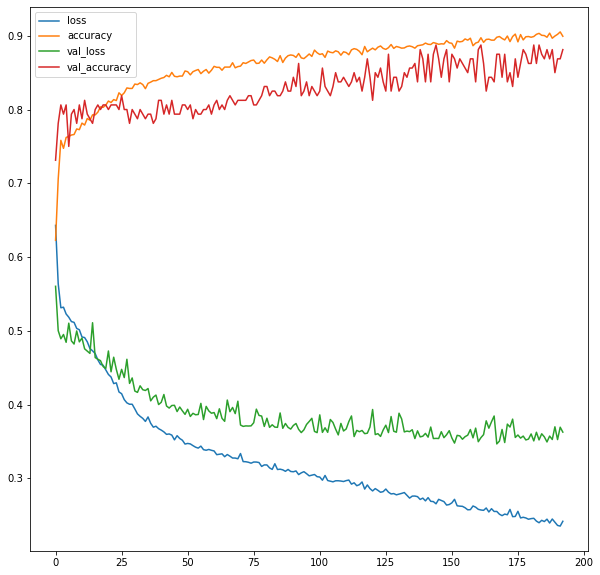

In [226]:
model_loss.plot(figsize=(10,10))

In [227]:
pred_prob = model.predict(X_test)
pred_class = model.predict_classes(X_test)

In [228]:
print(classification_report(y_test,pred_class))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89        81
           1       0.91      0.85      0.88        79

    accuracy                           0.88       160
   macro avg       0.88      0.88      0.88       160
weighted avg       0.88      0.88      0.88       160



In [229]:
model.save('img_class_CNNv1')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: img_class_CNNv1/assets
